<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

# Latihan 1

In [92]:
# Upload file Excel
from google.colab import files
uploaded = files.upload()

Saving latihan_satu.xlsx to latihan_satu (2).xlsx


In [93]:
# Baca file Excel
import pandas as pd

df = pd.read_excel("latihan_satu.xlsx")
print("Data lengkap dari Excel:")
display(df)

# Ambil hanya kolom yang dibutuhkan untuk KNN
data = df[['Temperatur Udara', 'Kecepatan Angin', 'Klasifikasi atau Persepsi Marry']]
data = data.dropna()  # buang baris kosong jika ada

print("\nData Training yang digunakan:")
display(data)

Data lengkap dari Excel:


,Temperatur Udara,Kecepatan Angin,Klasifikasi atau Persepsi Marry
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas



Data Training yang digunakan:


,Temperatur Udara,Kecepatan Angin,Klasifikasi atau Persepsi Marry
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['Temperatur Udara', 'Kecepatan Angin']]
y = data['Klasifikasi atau Persepsi Marry']

# Bagi data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cari K terbaik (1–5)
best_k = 1
best_acc = 0
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}, Akurasi={acc}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\nK terbaik: {best_k}, Akurasi: {best_acc}")

# Prediksi data uji (16, 3)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X, y)
hasil = knn_best.predict([[16, 3]])

print("\nPrediksi untuk data (Suhu=16°C, Angin=3 km/jam):", hasil[0])

K=1, Akurasi=1.0
K=2, Akurasi=1.0
K=3, Akurasi=0.5
K=4, Akurasi=0.5
K=5, Akurasi=0.5

K terbaik: 1, Akurasi: 1.0

Prediksi untuk data (Suhu=16°C, Angin=3 km/jam): Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Latihan 2

In [95]:
# Upload File Excel dari PC kamu
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Membaca file (sesuaikan dengan nama file kamu)
df = pd.read_excel("latihan_dua.xlsx")
display(df)

# Asumsikan nama kolom seperti pada gambar:
# "Hasil Sebenarnya" dan "Hasil Prediksi"
y_true = df["Hasil Sebenarnya"]
y_pred = df["Hasil Prediksi"]

# Confusion Matrix & Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["Lulus", "Tidak Lulus"])
cm_df = pd.DataFrame(cm,
                     index=["Actual Lulus", "Actual Tidak Lulus"],
                     columns=["Pred Lulus", "Pred Tidak Lulus"])

print("\n Confusion Matrix:")
display(cm_df)

# Hitung evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label="Lulus")
recall = recall_score(y_true, y_pred, pos_label="Lulus")

print(f"Accuracy  : {accuracy:.2%}")
print(f"Precision : {precision:.2%}")
print(f"Recall    : {recall:.2%}")

Saving latihan_dua.xlsx to latihan_dua.xlsx


,Nim,Hasil Sebenarnya,Hasil Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus



 Confusion Matrix:


,Pred Lulus,Pred Tidak Lulus
Actual Lulus,3,2
Actual Tidak Lulus,1,4


Accuracy  : 70.00%
Precision : 75.00%
Recall    : 60.00%


# Praktikum Mandiri

In [57]:
df_train = pd.read_csv('/content/data_train_80.csv')
df_test = pd.read_csv('/content/data_test_20.csv')

In [58]:
df_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,32.0,66,6.0,92.0,partly cloudy,1010.21,2,Spring,1.5,inland,Rainy
1,15.0,96,11.0,57.0,overcast,1016.98,0,Autumn,4.0,mountain,Rainy
2,28.0,58,6.5,11.0,clear,1025.37,10,Summer,9.0,inland,Sunny
3,47.0,84,44.5,85.0,overcast,992.26,2,Winter,2.0,coastal,Rainy
4,18.0,66,14.0,10.0,partly cloudy,1000.04,1,Autumn,8.0,coastal,Cloudy


In [59]:
df_test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,23.0,38,4.5,6.0,clear,1021.19,9,Autumn,10.0,inland,Sunny
1,62.0,94,14.5,83.0,clear,1025.57,10,Summer,4.0,inland,Sunny
2,40.0,51,2.0,12.0,partly cloudy,1025.15,8,Spring,8.0,mountain,Sunny
3,-7.0,79,6.5,90.0,overcast,993.56,0,Winter,1.5,inland,Snowy
4,21.0,94,10.0,109.0,partly cloudy,1027.71,11,Spring,9.0,mountain,Sunny


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           10560 non-null  float64
 1   Humidity              10560 non-null  int64  
 2   Wind Speed            10560 non-null  float64
 3   Precipitation (%)     10560 non-null  float64
 4   Cloud Cover           10560 non-null  object 
 5   Atmospheric Pressure  10560 non-null  float64
 6   UV Index              10560 non-null  int64  
 7   Season                10560 non-null  object 
 8   Visibility (km)       10560 non-null  float64
 9   Location              10560 non-null  object 
 10  Weather Type          10560 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 907.6+ KB


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           2640 non-null   float64
 1   Humidity              2640 non-null   int64  
 2   Wind Speed            2640 non-null   float64
 3   Precipitation (%)     2640 non-null   float64
 4   Cloud Cover           2640 non-null   object 
 5   Atmospheric Pressure  2640 non-null   float64
 6   UV Index              2640 non-null   int64  
 7   Season                2640 non-null   object 
 8   Visibility (km)       2640 non-null   float64
 9   Location              2640 non-null   object 
 10  Weather Type          2640 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 227.0+ KB


In [62]:
print(df_train['Cloud Cover'].unique())
print(df_train['Season'].unique())
print(df_train['Location'].unique())
print(df_train['Weather Type'].unique())

['partly cloudy' 'overcast' 'clear' 'cloudy']
['Spring' 'Autumn' 'Summer' 'Winter']
['inland' 'mountain' 'coastal']
['Rainy' 'Sunny' 'Cloudy' 'Snowy']


In [63]:
df_train.drop(columns=['Season'], inplace=True)
df_train.drop(columns=['Location'], inplace=True)
df_test.drop(columns=['Season'], inplace=True)
df_test.drop(columns=['Location'], inplace=True)

In [64]:
replacements = {
    'Cloud Cover': {'clear': 3, 'partly cloudy': 2, 'cloudy': 1, 'overcast': 0},
    'Weather Type': {'Sunny': 3, 'Snowy': 2, 'Cloudy': 1, 'Rainy': 0}
}

df_train = df_train.replace(replacements)
df_train.head()

/tmp/ipython-input-454625649.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,32.0,66,6.0,92.0,2,1010.21,2,1.5,0
1,15.0,96,11.0,57.0,0,1016.98,0,4.0,0
2,28.0,58,6.5,11.0,3,1025.37,10,9.0,3
3,47.0,84,44.5,85.0,0,992.26,2,2.0,0
4,18.0,66,14.0,10.0,2,1000.04,1,8.0,1


In [65]:
df_test = df_test.replace(replacements)
df_test.head()

/tmp/ipython-input-4198041340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,23.0,38,4.5,6.0,3,1021.19,9,10.0,3
1,62.0,94,14.5,83.0,3,1025.57,10,4.0,3
2,40.0,51,2.0,12.0,2,1025.15,8,8.0,3
3,-7.0,79,6.5,90.0,0,993.56,0,1.5,2
4,21.0,94,10.0,109.0,2,1027.71,11,9.0,3


In [66]:
df_train.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Visibility (km),0
Weather Type,0


In [67]:
df_test.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Visibility (km),0
Weather Type,0


In [68]:
df_train = df_train.drop(columns=['UV Index'])
df_train = df_train.drop(columns=['Visibility (km)'])
df_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,Weather Type
0,32.0,66,6.0,92.0,2,1010.21,0
1,15.0,96,11.0,57.0,0,1016.98,0
2,28.0,58,6.5,11.0,3,1025.37,3
3,47.0,84,44.5,85.0,0,992.26,0
4,18.0,66,14.0,10.0,2,1000.04,1


In [69]:
df_test = df_test.drop(columns=['UV Index'])
df_test = df_test.drop(columns=['Visibility (km)'])
df_test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,Weather Type
0,23.0,38,4.5,6.0,3,1021.19,3
1,62.0,94,14.5,83.0,3,1025.57,3
2,40.0,51,2.0,12.0,2,1025.15,3
3,-7.0,79,6.5,90.0,0,993.56,2
4,21.0,94,10.0,109.0,2,1027.71,3


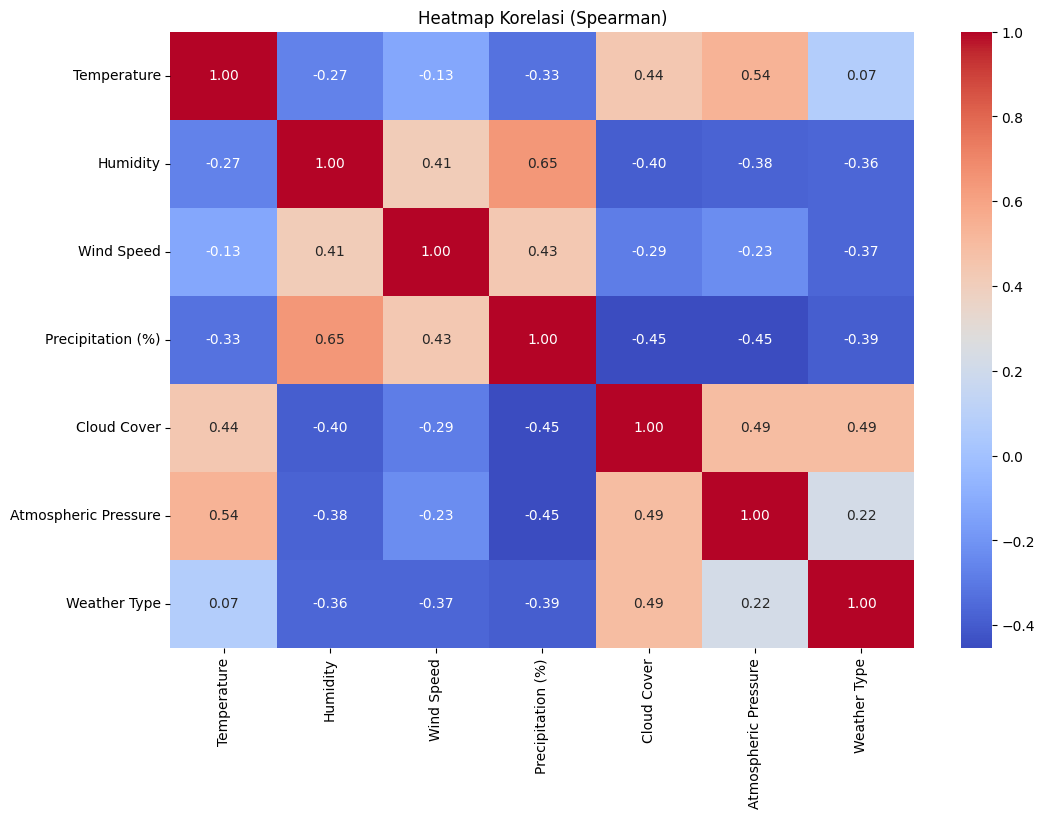

In [70]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_train.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman)")
plt.show()

In [71]:
df_train['Weather Type'].value_counts()

,count
Weather Type,
3,2659
0,2653
1,2649
2,2599


/tmp/ipython-input-4290595633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df_train, palette='Set2')


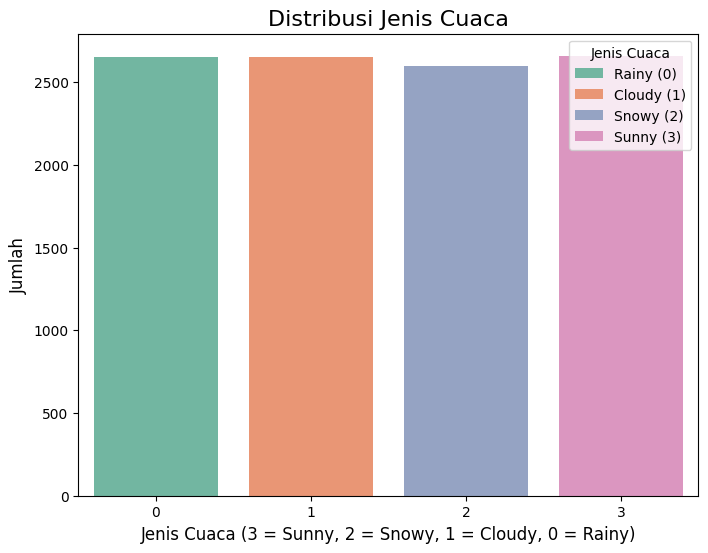

In [89]:
# Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df_train, palette='Set2')

#{'Sunny': 3, 'Snowy': 2, 'Cloudy': 1, 'Rainy': 0}

# Menambahkan judul dan label
plt.title('Distribusi Jenis Cuaca', fontsize=16)
plt.xlabel('Jenis Cuaca (3 = Sunny, 2 = Snowy, 1 = Cloudy, 0 = Rainy)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend (adjusted labels for correctness)
plt.legend(title='Jenis Cuaca', labels=['Rainy (0)', 'Cloudy (1)', 'Snowy (2)', 'Sunny (3)'], loc='upper right')

# Menampilkan plot
plt.show()

In [73]:
# data yang dilatih
x_train = df_train.drop(columns=['Weather Type'])
y_train = df_train['Weather Type']

# data validasinya
x_test = df_test.drop(columns=['Weather Type'])
y_test = df_test['Weather Type']

# Normalisasi features after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [74]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
3    2659
0    2653
1    2649
2    2599
Name: count, dtype: int64
After SMOTE:
Weather Type
0    2659
3    2659
1    2659
2    2659
Name: count, dtype: int64


In [80]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Score (CV): 0.8930987553510009


In [81]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# Prediksi
y_pred = best_knn.predict(x_test_scaled)

In [82]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       647
           1       0.88      0.84      0.86       651
           2       0.91      0.95      0.93       701
           3       0.91      0.89      0.90       641

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640



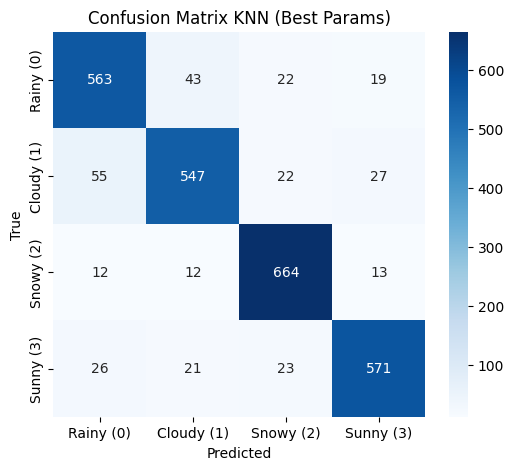

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Urutan label sesuai encoding
labels = ['Rainy (0)', 'Cloudy (1)', 'Snowy (2)', 'Sunny (3)']

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [87]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.8930987553510009
Std Dev: 0.006049826438244021


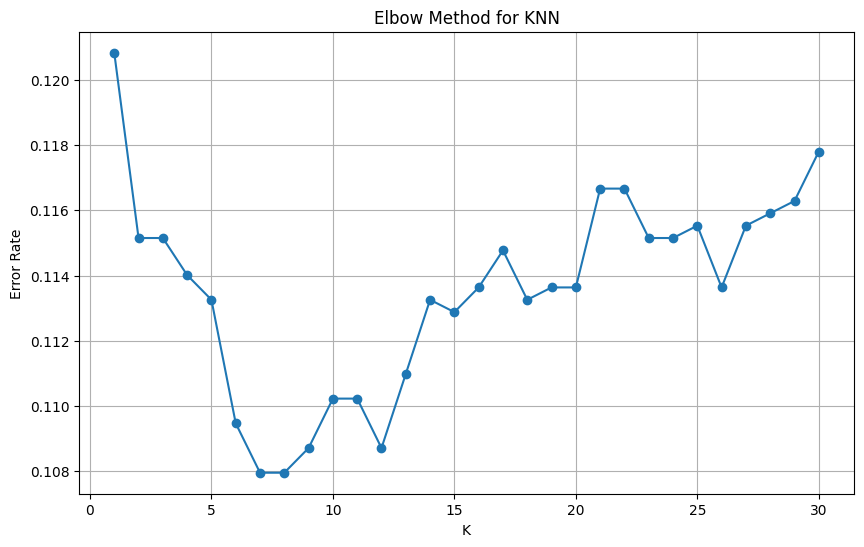

In [88]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()